In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [27]:
style.use('ggplot')

In [28]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
    
    def fit(self, data):
        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [29]:
def main():
    df = pd.read_csv(r"Iris.csv")
    df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

    X = df.values #returns a numpy array

    km = K_Means(3)
    km.fit(X)

    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)

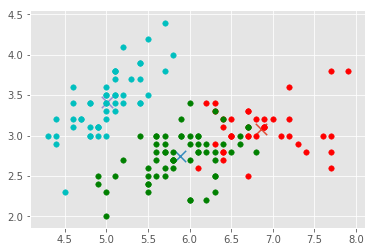

In [30]:
if __name__ == "__main__":
	main()